# Tensorflow2(Sequential API, Functional API, Subclassing API)とMNISTではじめる画像分類

[参照](https://qiita.com/hiro871_/items/8e8fd65c28d1e2a13fa9)

## dataset

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train, x_test = x_train / 255., x_test / 255.

2024-04-27 13:53:20.776430: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 13:53:20.776455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 13:53:20.777170: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-27 13:53:20.782087: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 13:53:21.573570: W tensorflow/compiler/tf2

In [2]:
t_train = tf.keras.utils.to_categorical(t_train, 10)
t_test = tf.keras.utils.to_categorical(t_test, 10)

In [3]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


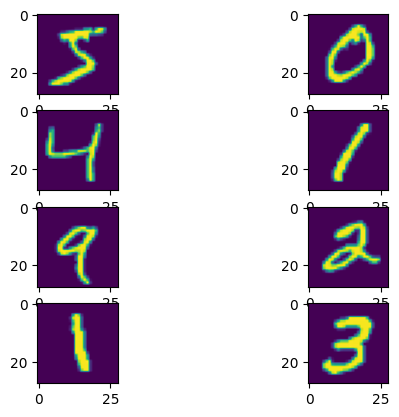

In [4]:
from matplotlib import pyplot as plt

for i in range(8):
    plt.subplot(420+1+i)  # こんな書き方できるんか！
    plt.imshow(x_train[i])

## Sequential API を利用してモデルの構築

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Reshape(target_shape=(1, 28, 28), input_shape=(28,28)))
model.add(tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2024-04-27 10:44:37.227194: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-27 10:44:37.267987: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-27 10:44:37.268147: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 28, 28)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 28, 28)        288       
                                                                 
 average_pooling2d (Average  (None, 32, 14, 14)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 14, 14)        9216      
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 7, 7)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 7, 7)          1

In [8]:
# (None, 32, 14, 14) → (None, 32, 14, 14) の変換に必要なカーネルパラメータ

32 * 32 * 9

9216

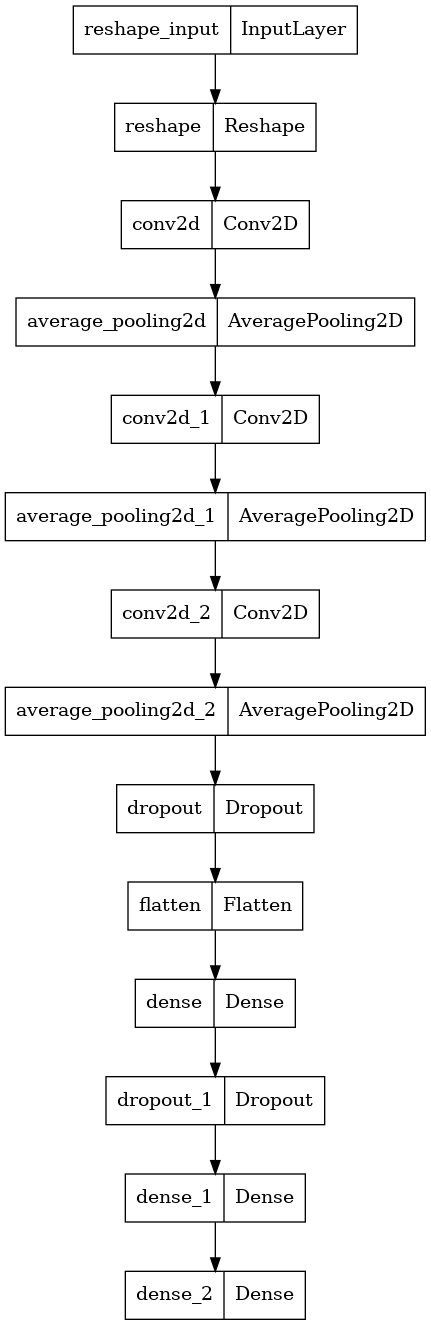

In [9]:
tf.keras.utils.plot_model(model)

In [10]:
model.fit(x=x_train, y=t_train, epochs=10, batch_size=128)

Epoch 1/10


2024-04-27 10:44:40.959070: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-27 10:44:41.880980: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa570bfdb90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-27 10:44:41.881002: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-04-27 10:44:41.887915: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1714182282.015970    3479 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 5s 5ms/step - loss: 0.6139 - accuracy: 0.8024
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2606 - accuracy: 0.9188
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1969 - accuracy: 0.9383
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1690 - accuracy: 0.9482
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1463 - accuracy: 0.9546
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1325 - accuracy: 0.9590
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1190 - accuracy: 0.9626
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1103 - accuracy: 0.9657
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1027 - accuracy: 0.9673
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0981 - accuracy: 0.9691


In [12]:
model.evaluate(x=x_test, y=t_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9763


[0.06995026767253876, 0.9763000011444092]

## Functional API を利用してモデルの構築

In [13]:
# Functional APIでモデルを定義します。
inputs   = tf.keras.layers.Input(shape=(28, 28), name='inputs')
flatten  = tf.keras.layers.Flatten(name='flatten')(inputs)
hidden1   = tf.keras.layers.Dense(128, activation='relu', name='relu1')(flatten)
hidden2   = tf.keras.layers.Dense(128, activation='relu', name='relu2')(hidden1)
concat   = tf.keras.layers.Concatenate(name='concat')([hidden1, hidden2])
outputs  = tf.keras.layers.Dense(10, activation='softmax', name='softmax')(concat)

# 入出力を定義します。
model    = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='functional')

In [14]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
model.summary()

Model: "functional"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28)]             0         []                            
                                                                                                  
 flatten (Flatten)           (None, 784)                  0         ['inputs[0][0]']              
                                                                                                  
 relu1 (Dense)               (None, 128)                  100480    ['flatten[0][0]']             
                                                                                                  
 relu2 (Dense)               (None, 128)                  16512     ['relu1[0][0]']               
                                                                                         

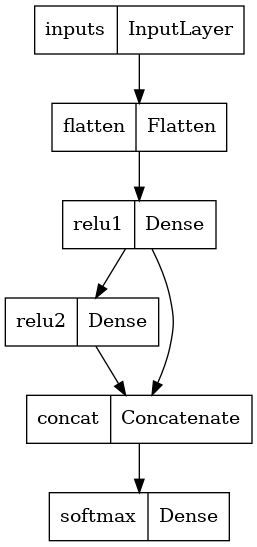

In [16]:
tf.keras.utils.plot_model(model)

In [17]:
model.fit(x=x_train, y=t_train, epochs=10, batch_size=128)

def train_step(model, optimizer, x, t):
  with tf.GradientTape() as tape:
    y = model(x)
    l = compute_loss(y,t)

  grad =tape.gradient(l, model.trainable_variables)
  optimizer.apply_gradients(zip(grad, model.trainable_variables))


train_step_1 = tf.function(train_step)
train_step_2 = tf.function(train_step)

train_step_1(model_1, optimizer_1, x,t )
train_step_2(model_2, optimizer_2, x,t )


Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 1.1417 - accuracy: 0.7227
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4904 - accuracy: 0.8734
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3923 - accuracy: 0.8925
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.9020
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.9084
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3037 - accuracy: 0.9133
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2881 - accuracy: 0.9186
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2748 - accuracy: 0.9215
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2634 - accuracy: 0.9251
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2531 - accuracy: 0.9283

In [18]:
model.evaluate(x=x_test, y=t_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2423 - accuracy: 0.9327


[0.24233534932136536, 0.932699978351593]

## Subclassing API を利用してモデル構築

PyTorch に似てる

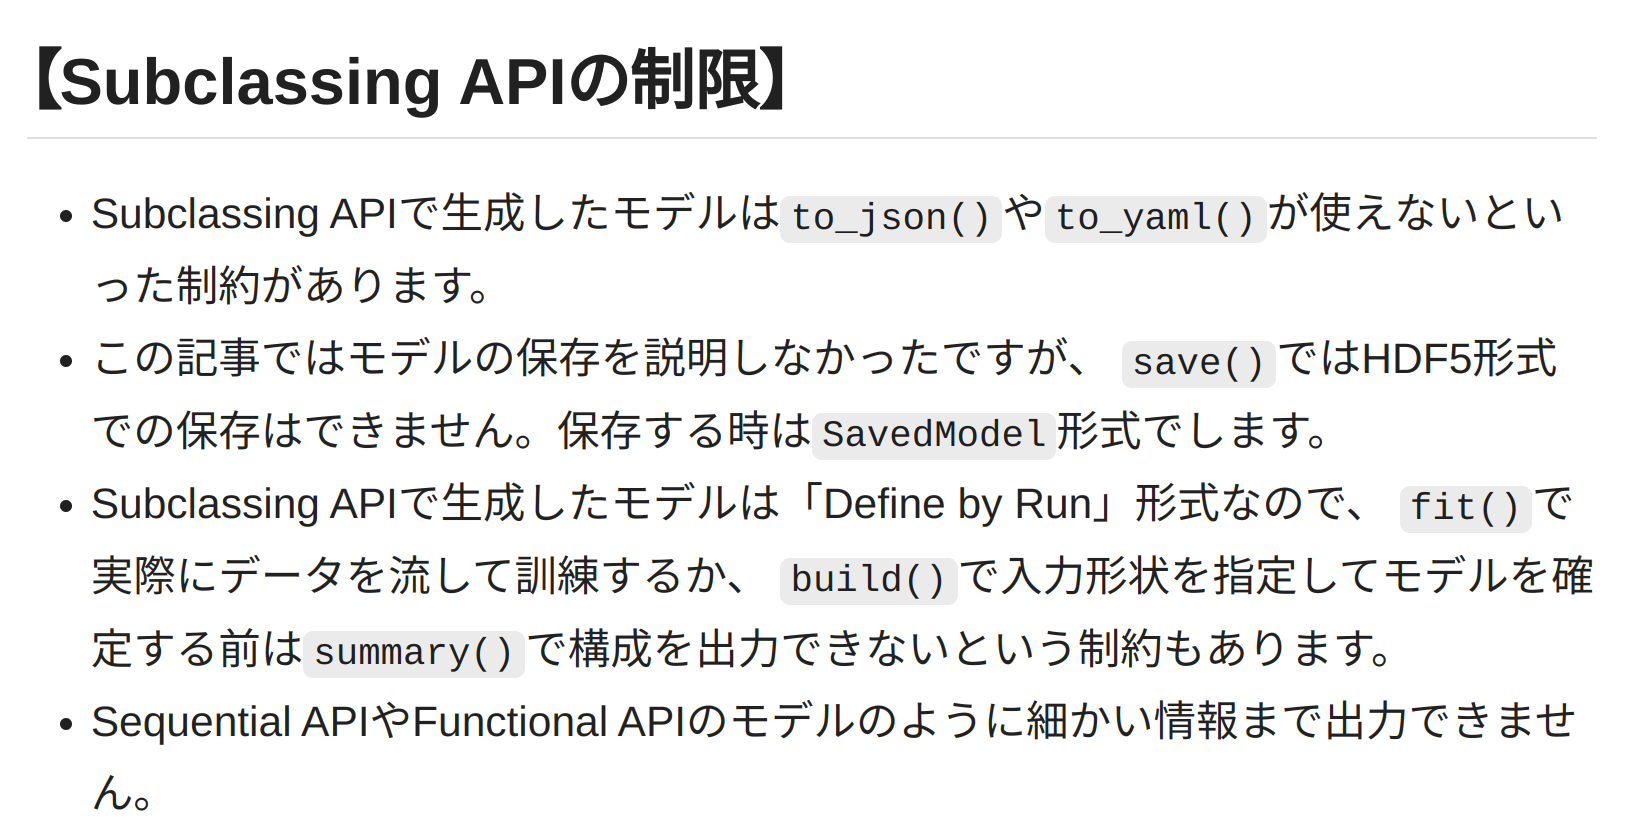

In [13]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train, x_test = x_train / 255., x_test / 255.

In [14]:
from tensorflow.keras import layers

class ClassificationModel(tf.keras.Model):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.reshape = layers.Reshape(target_shape=(1, 28, 28), input_shape=(28,28))
        self.conv1 = layers.Conv2D(32, 3, activation='relu', data_format="channels_first")
        self.flatten = layers.Flatten()
        self.d1 = layers.Dense(128, activation='relu')
        self.d2 = layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.reshape(x)
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

model = ClassificationModel()

In [18]:
@tf.function
def train_step(x, t):
    with tf.GradientTape() as tape:
        predictions = model(x, training=True)
        loss = loss_object(t, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(t, predictions)

@tf.function
def test_step(x, t):
    test_predictions = model(x)
    t_loss = loss_object(t, test_predictions)

    test_loss(t_loss)
    test_accuracy(t, test_predictions)

In [19]:
#損失関数
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()  # on hot encoding してないときに使うっぽい。

#最適化関数
optimizer = tf.keras.optimizers.Adam()

# 評価指標
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [21]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, t_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, t_test)).batch(32)

EPOCHS = 3

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels) #学習

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels) #評価

  template = 'Epoch {}, Loss: {}, Accuracy: {}, test-Loss: {}, test-Accuracy:{}'
  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epoch 1, Loss: 0.019355831667780876, Accuracy: 99.38983917236328, test-Loss: 0.05975043773651123, test-Accuracy:98.22750091552734
Epoch 2, Loss: 0.016949201002717018, Accuracy: 99.46266174316406, test-Loss: 0.061472032219171524, test-Accuracy:98.26200103759766
Epoch 3, Loss: 0.015032686293125153, Accuracy: 99.5179443359375, test-Loss: 0.0648965910077095, test-Accuracy:98.27833557128906
